In [35]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.metrics import max_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df= pd.read_csv('Data/main.csv')
df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE
0,1/1/2003,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8
1,2/1/2003,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9
2,3/1/2003,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9
3,4/1/2003,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0
4,5/1/2003,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,4/1/2023,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4
244,5/1/2023,302.657,8.23,303.294,97.177669,100.062858,2.21,22761.5,335013.0,15697.7,-1.785977,3.7
245,6/1/2023,304.635,8.25,303.841,97.489157,NaN,2.20,22822.8,335163.0,15701.3,2.280162,3.6
246,NaN,NaN,8.29,304.348,97.950268,NaN,2.30,22867.8,335329.0,15673.5,3.372091,3.5


In [3]:
main_df = df.copy()
main_df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE
0,1/1/2003,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8
1,2/1/2003,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9
2,3/1/2003,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9
3,4/1/2003,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0
4,5/1/2003,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,4/1/2023,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4
244,5/1/2023,302.657,8.23,303.294,97.177669,100.062858,2.21,22761.5,335013.0,15697.7,-1.785977,3.7
245,6/1/2023,304.635,8.25,303.841,97.489157,NaN,2.20,22822.8,335163.0,15701.3,2.280162,3.6
246,NaN,NaN,8.29,304.348,97.950268,NaN,2.30,22867.8,335329.0,15673.5,3.372091,3.5


In [4]:
main_df.dropna(inplace=True)

In [5]:
main_df['DATE'] = pd.to_datetime(main_df['DATE'])

main_df['YEAR'] = main_df['DATE'].dt.year
main_df['MONTH'] = main_df['DATE'].dt.month
main_df['QUARTER'] = main_df['DATE'].dt.quarter

main_df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE,YEAR,MONTH,QUARTER
0,2003-01-01,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,2003,1,1
1,2003-02-01,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,2003,2,1
2,2003-03-01,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,2003,3,1
3,2003-04-01,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,2003,4,2
4,2003-05-01,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,2003,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533.0,15504.7,2.671263,3.4,2023,1,1
241,2023-02-01,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637.0,15545.3,0.830646,3.6,2023,2,1
242,2023-03-01,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753.0,15598.6,-4.792700,3.5,2023,3,1
243,2023-04-01,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,2023,4,2


In [6]:
col_name = {
    'MPRIME':'BANKLOAN_RATE',
    'CPIAUCSL':'CONSUMER_PRICE_INDEX',
    'CSCICP03USM665S':'CONSUMER_SENTIMENT_INDEX',
    'USALORSGPNOSTSAM':'GDP',
    'T10YIEM':'INFLATION_RATE',
    'PI':'PERSONAL_INCOME',
    'POPTHM':'POPULATION',
    'DSPIC96':'REAL_DISPOSABLE_PERSONAL_INCOME',
    'SPASTT01USM657N':'TOTAL_SHARE_PRICE',
    'UNRATE':'UNEMPLOYMENT_RATE',
    'CSUSHPISA':'HOUSE_PRICE_INDEX'
}

main_df.rename(columns= col_name, inplace=True)

main_df

,DATE,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE,YEAR,MONTH,QUARTER
0,2003-01-01,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,2003,1,1
1,2003-02-01,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,2003,2,1
2,2003-03-01,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,2003,3,1
3,2003-04-01,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,2003,4,2
4,2003-05-01,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,2003,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533.0,15504.7,2.671263,3.4,2023,1,1
241,2023-02-01,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637.0,15545.3,0.830646,3.6,2023,2,1
242,2023-03-01,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753.0,15598.6,-4.792700,3.5,2023,3,1
243,2023-04-01,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,2023,4,2


In [7]:
main_df['POPULATION'] = main_df['POPULATION'] * 1000
main_df['POPULATION']

0      289412000.0
1      289606000.0
2      289809000.0
3      290024000.0
4      290250000.0
          ...     
240    334533000.0
241    334637000.0
242    334753000.0
243    334880000.0
244    335013000.0
Name: POPULATION, Length: 245, dtype: float64

In [8]:
main_df.columns

main_df = main_df[[
    'DATE', 'YEAR', 'MONTH', 'QUARTER', 'HOUSE_PRICE_INDEX',
       'BANKLOAN_RATE', 'CONSUMER_PRICE_INDEX', 'CONSUMER_SENTIMENT_INDEX',
       'GDP', 'INFLATION_RATE', 'PERSONAL_INCOME', 'POPULATION',
       'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
       'UNEMPLOYMENT_RATE'
]]

main_df


,DATE,YEAR,MONTH,QUARTER,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE
0,2003-01-01,2003,1,1,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412000.0,10133.6,-0.368127,5.8
1,2003-02-01,2003,2,1,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606000.0,10097.6,-6.280696,5.9
2,2003-03-01,2003,3,1,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809000.0,10121.5,-0.293998,5.9
3,2003-04-01,2003,4,2,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024000.0,10181.4,5.388649,6.0
4,2003-05-01,2003,5,2,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250000.0,10261.2,5.865718,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,2023,1,1,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533000.0,15504.7,2.671263,3.4
241,2023-02-01,2023,2,1,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637000.0,15545.3,0.830646,3.6
242,2023-03-01,2023,3,1,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753000.0,15598.6,-4.792700,3.5
243,2023-04-01,2023,4,2,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880000.0,15633.0,2.863582,3.4


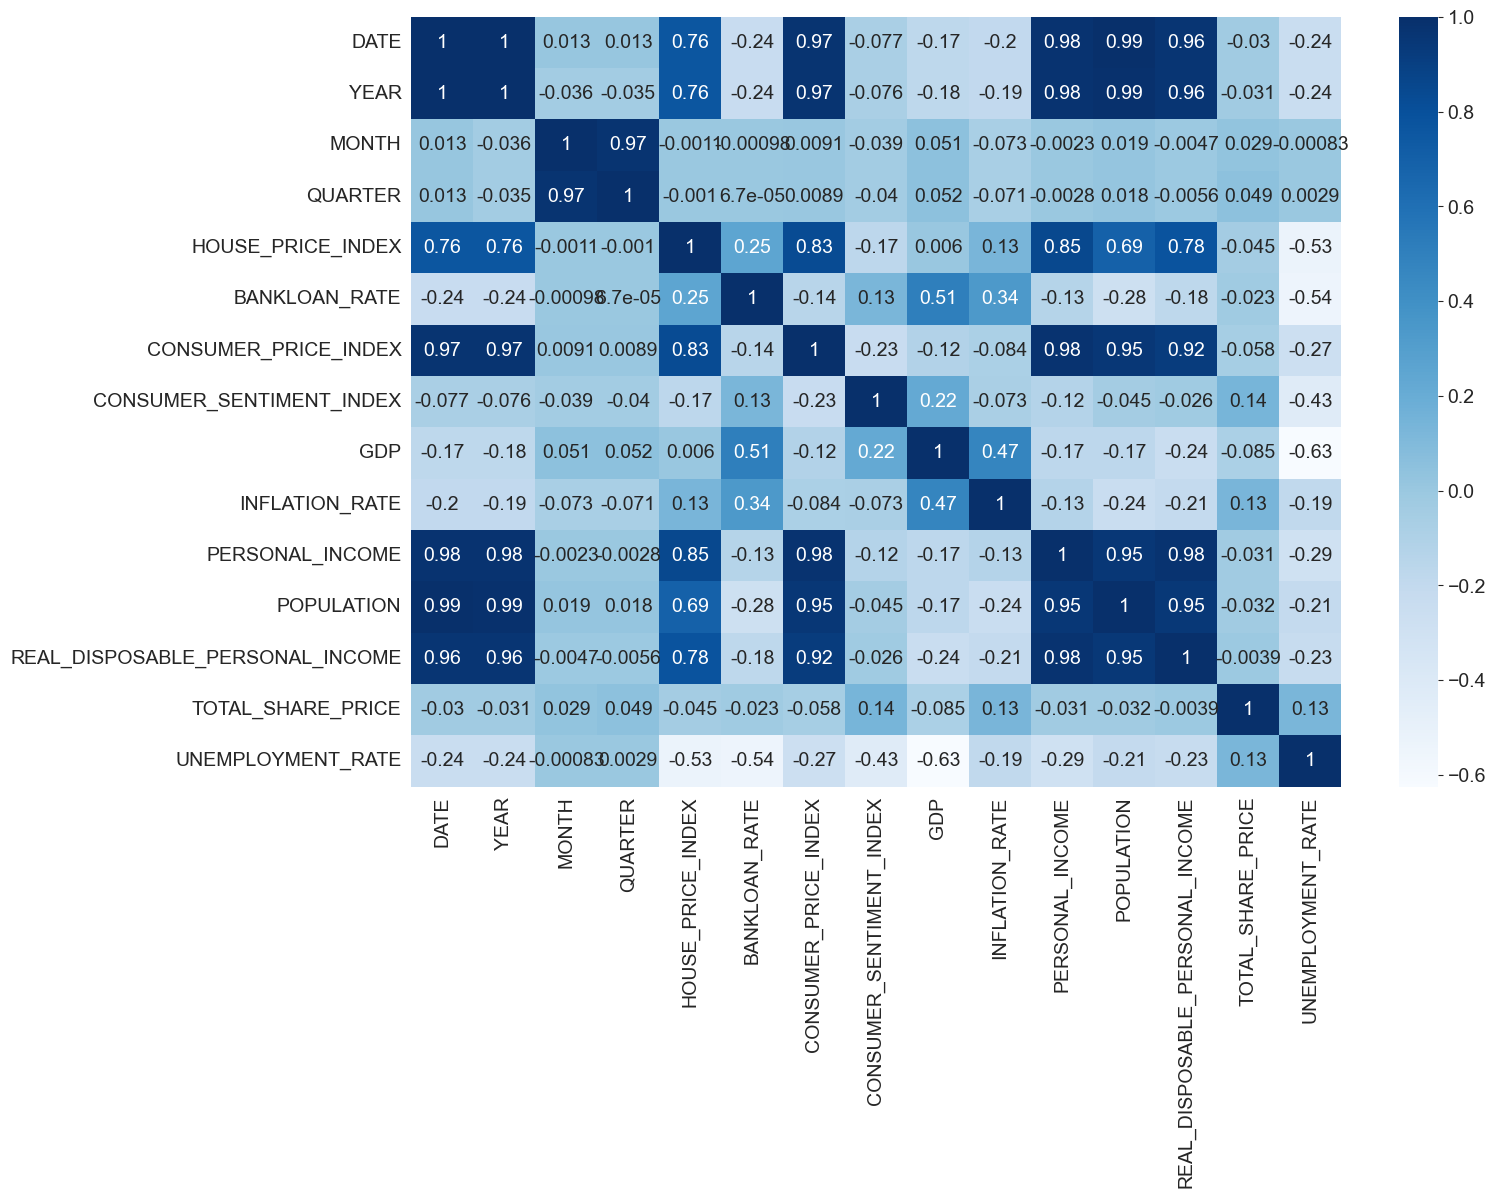

In [9]:
# Correlation Heatmap
ax = main_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(ax, cmap='Blues', annot=True);

In [10]:
# Correlation with House Price Index in Descending Order
main_df.corr()['HOUSE_PRICE_INDEX'].sort_values(ascending=False)

HOUSE_PRICE_INDEX                  1.000000
PERSONAL_INCOME                    0.853586
CONSUMER_PRICE_INDEX               0.829107
REAL_DISPOSABLE_PERSONAL_INCOME    0.781638
DATE                               0.759358
YEAR                               0.758989
POPULATION                         0.691565
BANKLOAN_RATE                      0.252750
INFLATION_RATE                     0.132472
GDP                                0.006043
QUARTER                           -0.001017
MONTH                             -0.001117
TOTAL_SHARE_PRICE                 -0.045432
CONSUMER_SENTIMENT_INDEX          -0.170706
UNEMPLOYMENT_RATE                 -0.526346
Name: HOUSE_PRICE_INDEX, dtype: float64

# Exploratory Analysis

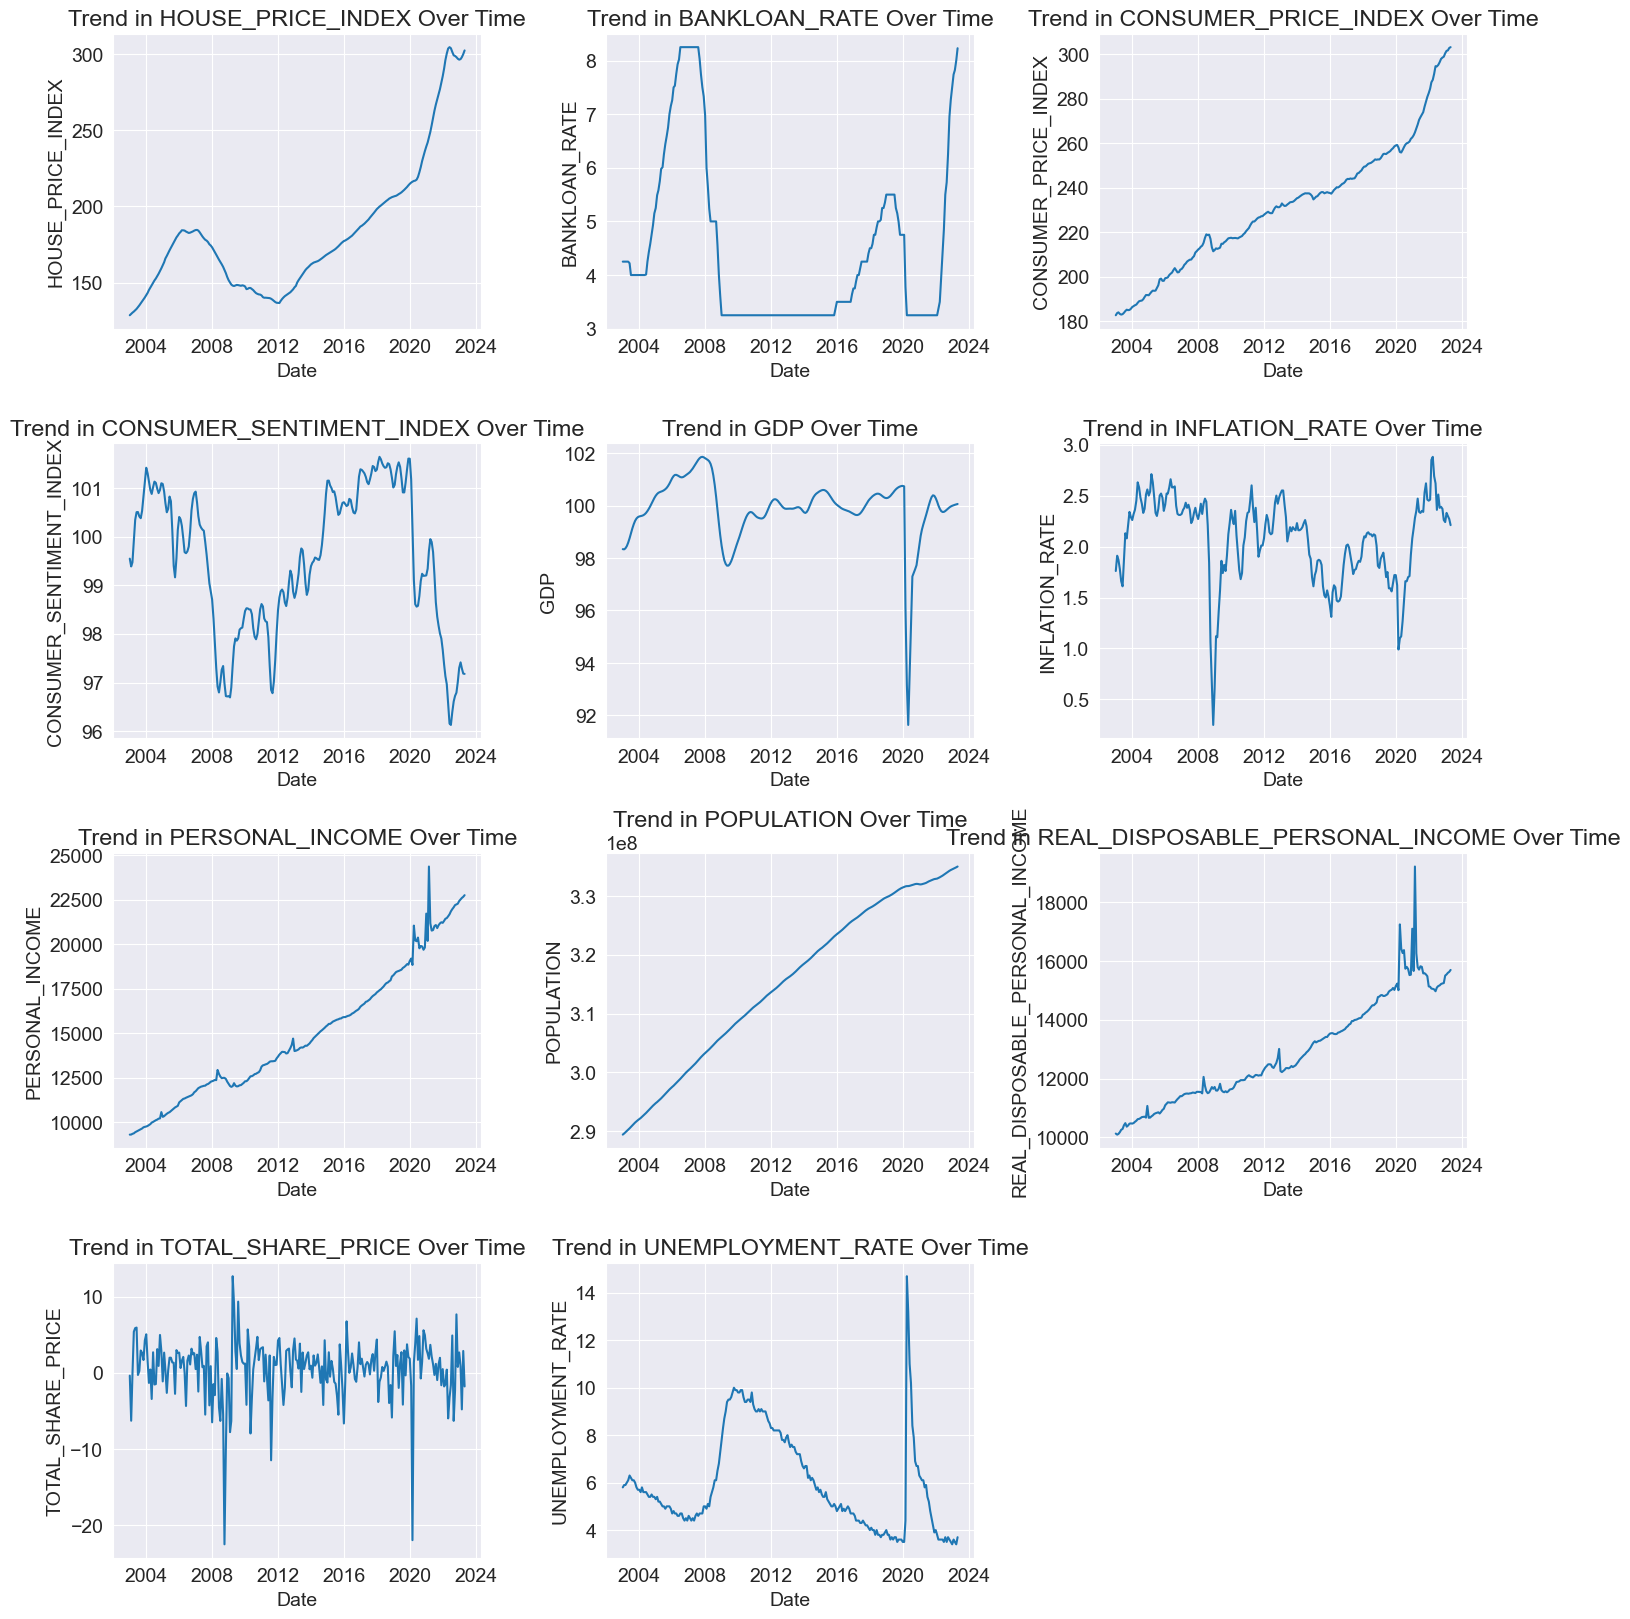

In [11]:
# What is the overall trend in each variable over time?

variables_to_analyze = [
    'HOUSE_PRICE_INDEX', 'BANKLOAN_RATE',
    'CONSUMER_PRICE_INDEX', 'CONSUMER_SENTIMENT_INDEX', 'GDP',
    'INFLATION_RATE', 'PERSONAL_INCOME', 'POPULATION',
    'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
    'UNEMPLOYMENT_RATE'
]

num_rows = 5  # Number of rows in the grid
num_cols = 3  # Number of columns in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing


for i, variable in enumerate(variables_to_analyze):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(main_df['DATE'], main_df[variable])
    ax.set_title(f'Trend in {variable} Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel(variable)
    ax.grid(True)


for i in range(len(variables_to_analyze), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])


plt.tight_layout()
plt.show()

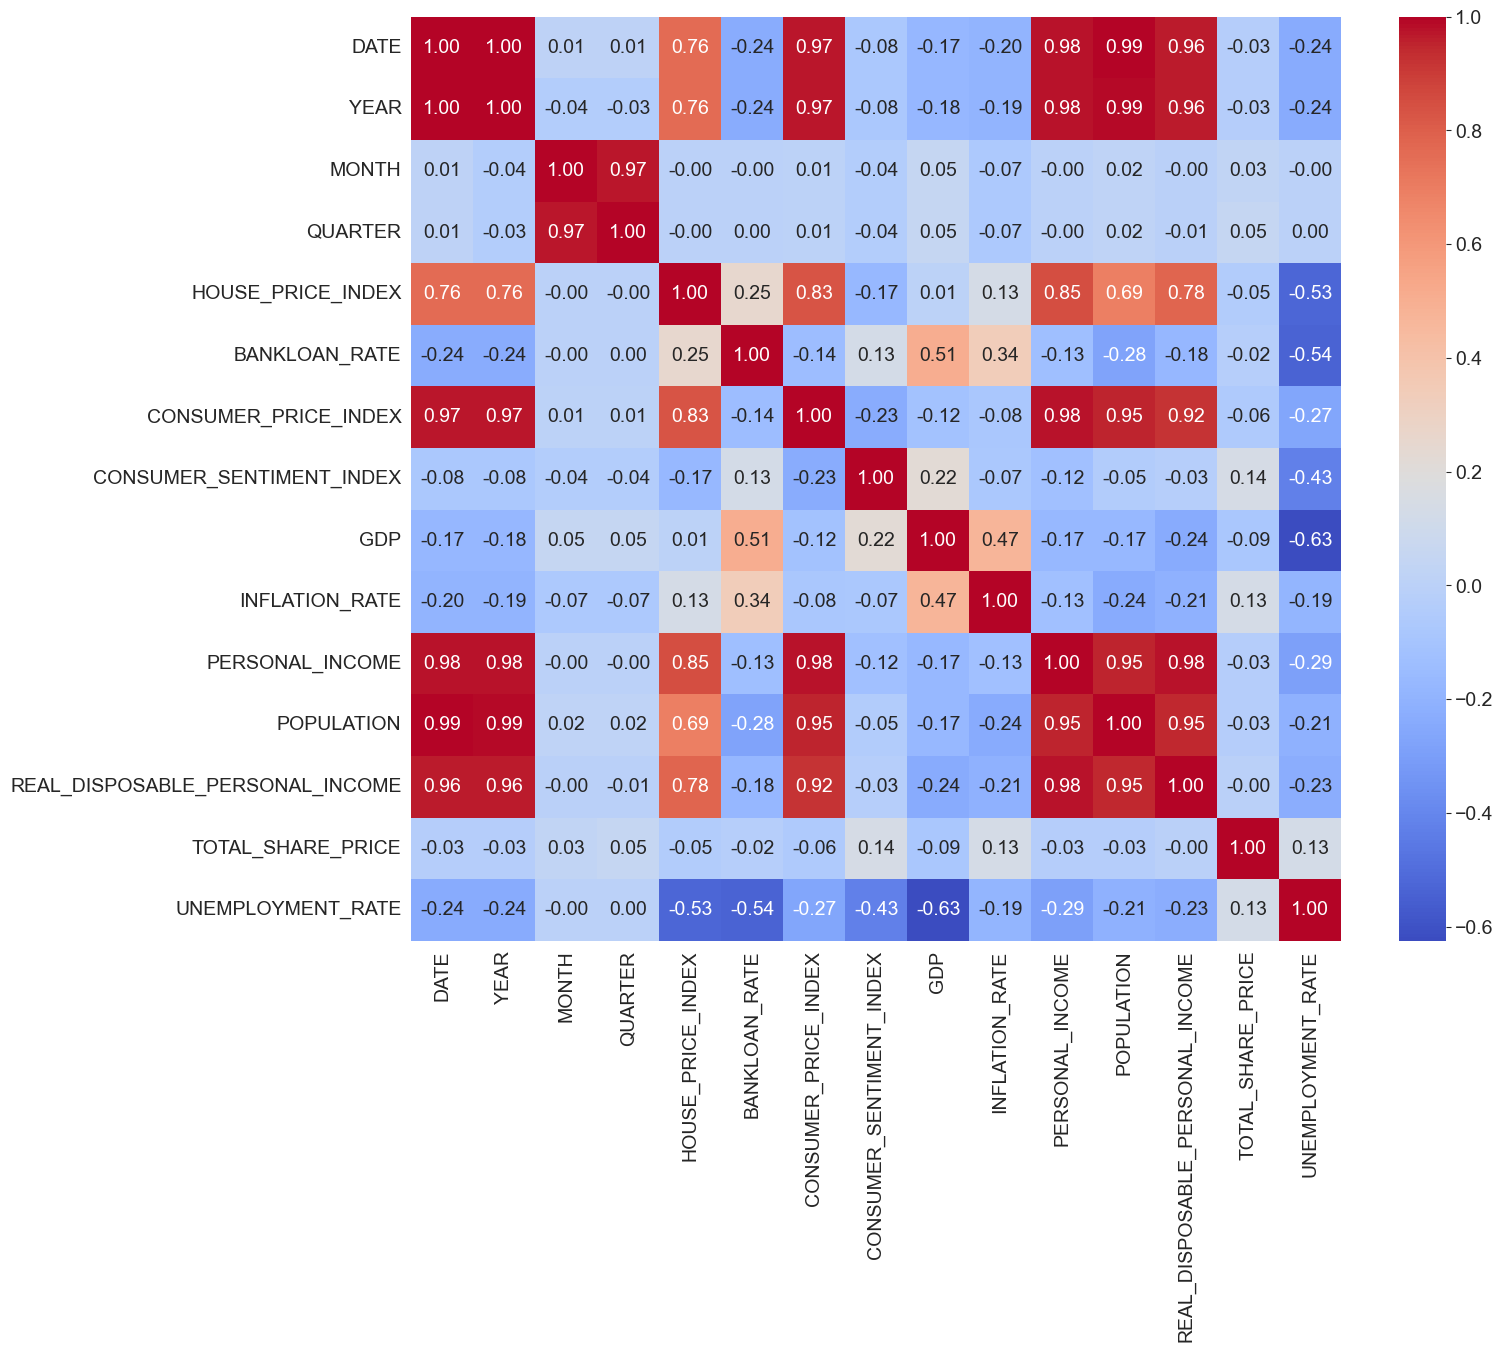

In [12]:
# What is the correlation between various variables?
ax = main_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(ax, cmap='coolwarm', annot=True, fmt='.2f');


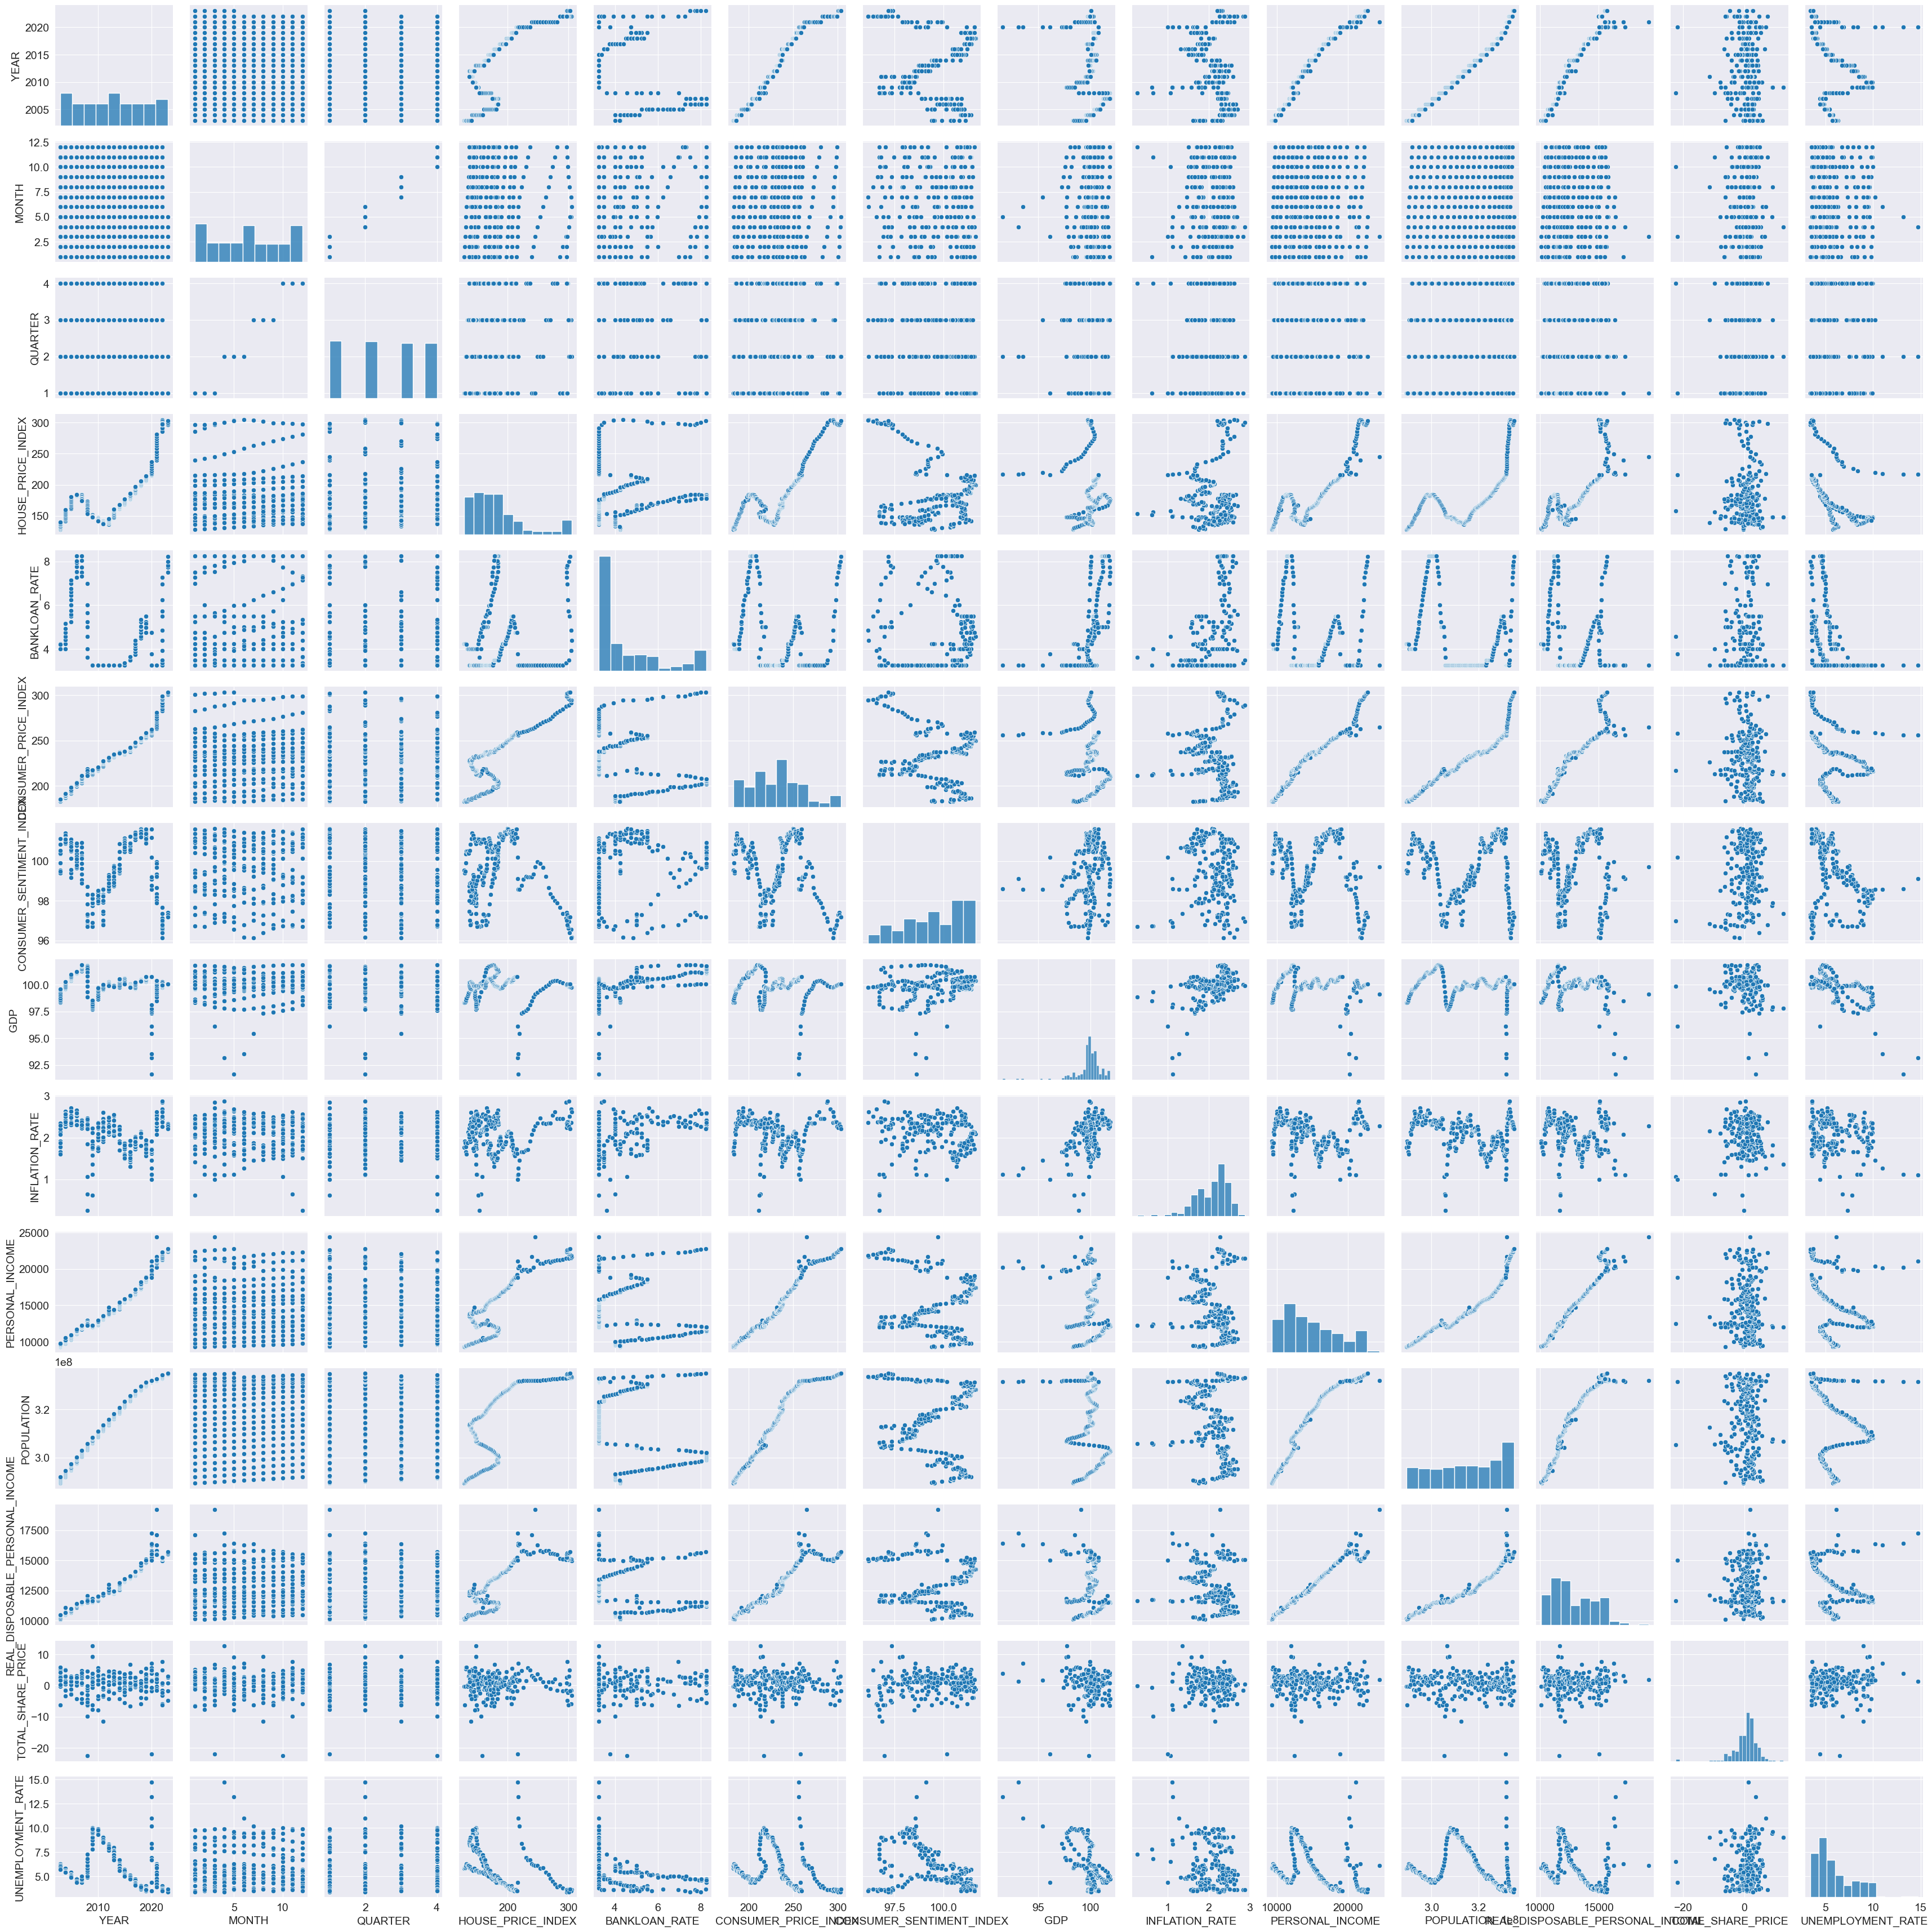

In [13]:
sns.pairplot(main_df);

# Part 2 of the Assignment

In [27]:
# Selecting input & Target columns

target_col = main_df['HOUSE_PRICE_INDEX']

input_cols = main_df[[
    'YEAR', 'MONTH', 'QUARTER',
    'BANKLOAN_RATE', 'CONSUMER_PRICE_INDEX', 'CONSUMER_SENTIMENT_INDEX',
    'GDP', 'INFLATION_RATE', 'PERSONAL_INCOME', 'POPULATION',
    'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
    'UNEMPLOYMENT_RATE'
]]